In [41]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import pandas as pd

Import data to create X_train_full, y_train_full, X_test and y_test variables

In [42]:
digit_mnist = keras.datasets.mnist
(x_train_full, y_train_full), (x_test, y_test) = digit_mnist.load_data()

Reshape the independent (X) data

In [51]:
x_train = x_train_full.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))


Normalize the data

In [53]:
x_train_n = x_train / 255.
x_test_n = x_test / 255.

Create a validation set of 6000 images

In [59]:
x_valid, x_train = x_train_n[:6000], x_train_n[6000:]
y_valid, y_train = y_train_full[:6000], y_train_full[6000:]
x_test = x_test_n

print(x_valid.shape)
print(x_train.shape)
print(y_valid.shape)
print(y_train.shape)
print(x_test.shape)

(6000, 28, 28, 1)
(54000, 28, 28, 1)
(6000,)
(54000,)
(10000, 28, 28, 1)


Creating model architecture

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

Create a CNN model (Model_A) with a Conv layer of filters = 32, kernel_size = (3, 3), strides=1, padding='valid', a Max pooling layer of 2 by 2 window and two dense layers with 200 and 100 neurons

In [61]:
model_a = keras.models.Sequential()
model_a.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_a.add(keras.layers.MaxPooling2D((2, 2)))
model_a.add(keras.layers.Flatten())
model_a.add(keras.layers.Dense(300, activation="relu"))
model_a.add(keras.layers.Dense(100, activation="relu"))
model_a.add(keras.layers.Dense(10, activation="softmax"))


 

In [62]:
model_a.compile(loss="sparse_categorical_crossentropy",

              optimizer="sgd",

              metrics=["accuracy"])

In [63]:
model_a.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_19 (Dense)             (None, 300)               1622700   
_________________________________________________________________
dense_20 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_21 (Dense)             (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
____________________________________________

In [64]:
model_a_history = model_a.fit(x_train, y_train, epochs=60, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/60
844/844 [==============================] - 36s 41ms/step - loss: 0.7186 - accuracy: 0.8168 - val_loss: 0.2826 - val_accuracy: 0.9168
Epoch 2/60
844/844 [==============================] - 34s 40ms/step - loss: 0.2633 - accuracy: 0.9227 - val_loss: 0.2130 - val_accuracy: 0.9410
Epoch 3/60
844/844 [==============================] - 34s 40ms/step - loss: 0.2048 - accuracy: 0.9391 - val_loss: 0.1766 - val_accuracy: 0.9507
Epoch 4/60
844/844 [==============================] - 54s 64ms/step - loss: 0.1684 - accuracy: 0.9498 - val_loss: 0.1448 - val_accuracy: 0.9593
Epoch 5/60
844/844 [==============================] - 58s 69ms/step - loss: 0.1430 - accuracy: 0.9568 - val_loss: 0.1282 - val_accuracy: 0.9640
Epoch 6/60
844/844 [==============================] - 62s 73ms/step - loss: 0.1241 - accuracy: 0.9630 - val_loss: 0.1135 - val_accuracy: 0.9668
Epoch 7/60
844/844 [==============================] - 58s 69ms/step - loss: 0.1103 - accuracy: 0.9677 - val_loss: 0.1014 - val_accuracy:

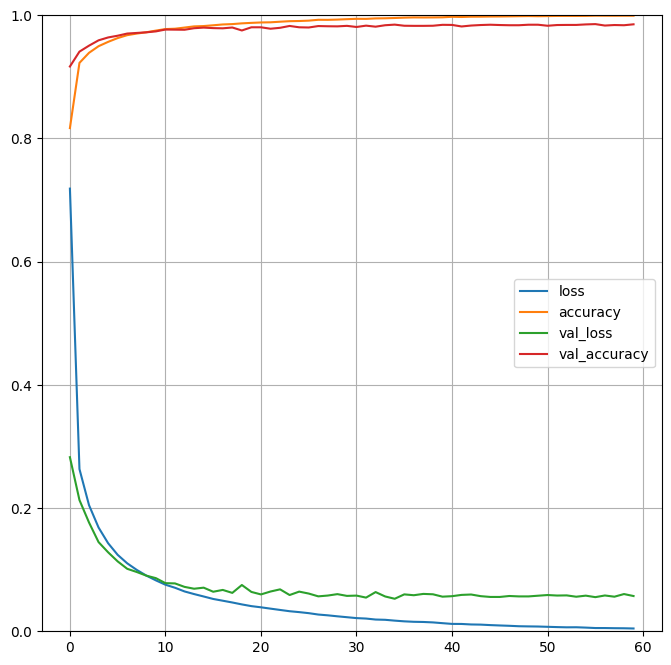

In [66]:
pd.DataFrame(model_a_history.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [68]:
evaluate = model_a.evaluate(x_test_n, y_test)
print(evaluate)

  1/313 [..............................] - ETA: 5s - loss: 2.7472 - accuracy: 0.0938

313/313 [==============================] - 1s 4ms/step - loss: 2.6387 - accuracy: 0.0892
[2.6387369632720947, 0.08919999748468399]


In [70]:
model_b = keras.models.Sequential()
model_b.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))
model_b.add(keras.layers.MaxPooling2D((2, 2)))
model_b.add(keras.layers.Flatten())
model_b.add(keras.layers.Dense(300, activation="relu"))
model_b.add(keras.layers.Dense(100, activation="relu"))
model_b.add(keras.layers.Dense(10, activation="softmax"))


 

In [71]:
model_b.compile(loss="sparse_categorical_crossentropy",

              optimizer="sgd",

              metrics=["accuracy"])

In [73]:
model_b_history = model_b.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_valid, y_valid))

Epoch 1/10
844/844 [==============================] - 29s 34ms/step - loss: 0.1077 - accuracy: 0.9679 - val_loss: 0.0987 - val_accuracy: 0.9712
Epoch 2/10
844/844 [==============================] - 29s 34ms/step - loss: 0.0967 - accuracy: 0.9718 - val_loss: 0.0968 - val_accuracy: 0.9697
Epoch 3/10
844/844 [==============================] - 29s 34ms/step - loss: 0.0880 - accuracy: 0.9736 - val_loss: 0.0868 - val_accuracy: 0.9750
Epoch 4/10
844/844 [==============================] - 29s 34ms/step - loss: 0.0802 - accuracy: 0.9760 - val_loss: 0.0815 - val_accuracy: 0.9763
Epoch 5/10
844/844 [==============================] - 29s 35ms/step - loss: 0.0735 - accuracy: 0.9779 - val_loss: 0.0806 - val_accuracy: 0.9757
Epoch 6/10
844/844 [==============================] - 29s 34ms/step - loss: 0.0679 - accuracy: 0.9801 - val_loss: 0.0724 - val_accuracy: 0.9782
Epoch 7/10
844/844 [==============================] - 30s 36ms/step - loss: 0.0640 - accuracy: 0.9809 - val_loss: 0.0714 - val_accuracy:

In [75]:
evaluate = model_b.evaluate(x_test_n, y_test)
print(evaluate)

313/313 [==============================] - 2s 6ms/step - loss: 2.3946 - accuracy: 0.0892
[2.3946144580841064, 0.08919999748468399]


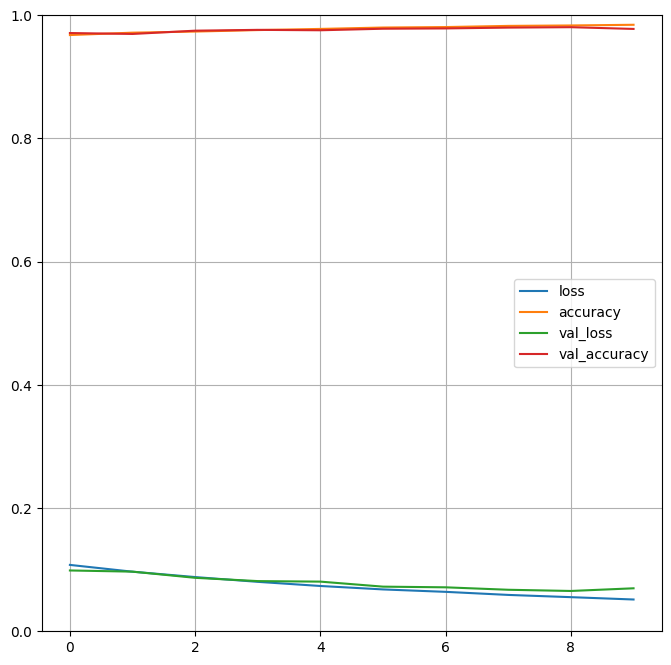

In [76]:
pd.DataFrame(model_b_history.history).plot(figsize=(8,8))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()